In [52]:
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import re
import numpy as np
import scimap as sm  
import napari
from matplotlib import pyplot as plt
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_byROI")

a = pd.read_csv('./expbyROI_linegate1202_Ki67+.csv')
b = pd.read_csv('./expbyROI_linegate1202_S100A1+.csv')
c = pd.read_csv('./expbyROI_linegate1202_NGFR+.csv')
d = pd.read_csv('./expbyROI_linegate1202_MART1+.csv')
e = pd.read_csv('./expbyROI_linegate1202_PRAME+.csv')
f = pd.read_csv('./expbyROI_linegate1202_SOX9+.csv')
abc = [a,b,c,d,e,f]

In [12]:
from scipy.stats import mannwhitneyu
def mann_whitney_test(df,column,morphology_groups):
        results = {}
        for i, group1 in enumerate(morphology_groups):
            for group2 in morphology_groups[i + 1:]:
                data1 = df[df[column] == group1][df.columns[3]]
                data2 = df[df[column] == group2][df.columns[3]]
                stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
                results[(group1, group2)] = p_value
        return results

In [32]:
from scipy.stats import levene

def levene_variance_test(df, column, morphology_groups):
    results = {}
    for i, group1 in enumerate(morphology_groups):
        for group2 in morphology_groups[i + 1:]:
            data1 = df[df[column] == group1][df.columns[3]]
            data2 = df[df[column] == group2][df.columns[3]]
            stat, p_value = levene(data1, data2)
            results[(group1, group2)] = p_value
    return results

In [46]:
def remove_outliers_iqr(df, group_col, value_col):
    def iqr_filter(group):
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        return group[(group[value_col] >= Q1 - 1.5 * IQR) & (group[value_col] <= Q3 + 1.5 * IQR)]
    return df.groupby(group_col, group_keys=False).apply(iqr_filter)

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



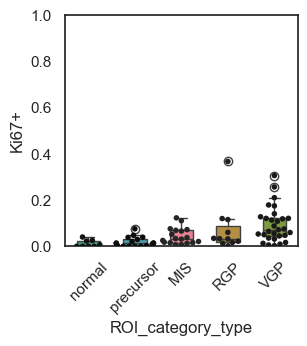

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.2% of the points cannot be placed; 

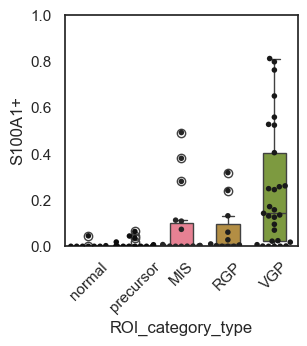

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

34.5% of the points cannot be placed; you may

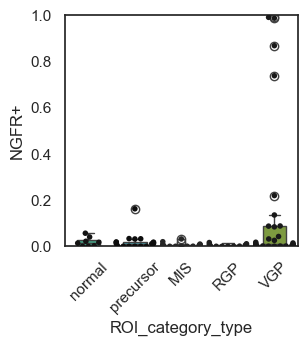

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



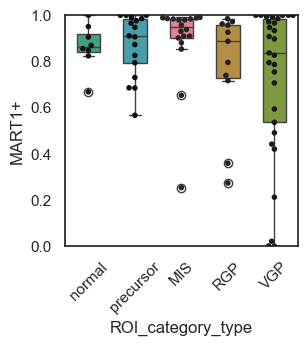

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



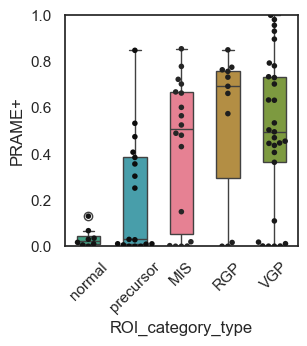

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2439732178.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



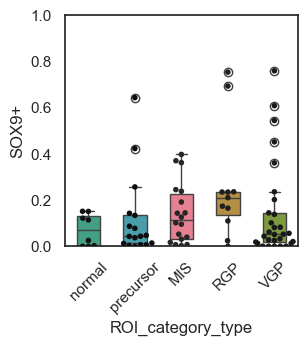

In [33]:
#look at relative ammount of cells negative for specific marker
order = ['normal','precursor','MIS','RGP','VGP']
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_byROI/levenes")
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = levene_variance_test(df,'ROI_category_type',order)

   
    #plt.savefig("expbyROI_cat_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("expbyROI_cat_linegate_levenes{}.csv".format(str(df.columns[2])), header=False)
   # df.to_csv("expbyROI_cat_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



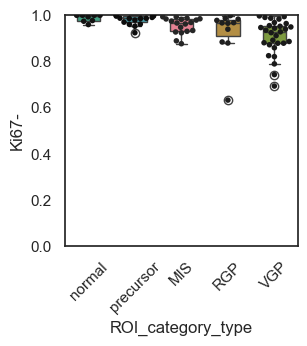

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.2% of the points cannot be placed; 

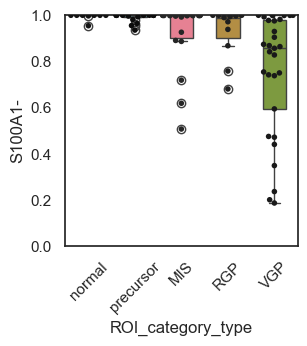

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

34.5% of the points cannot be placed; you may

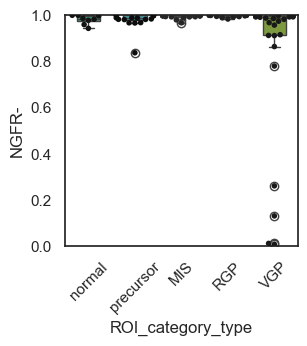

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



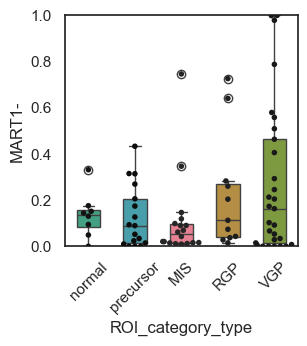

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



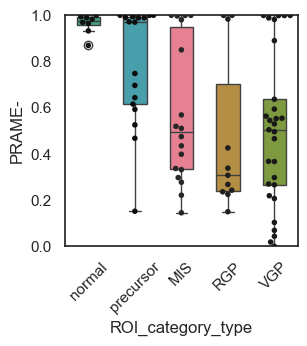

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1494717599.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



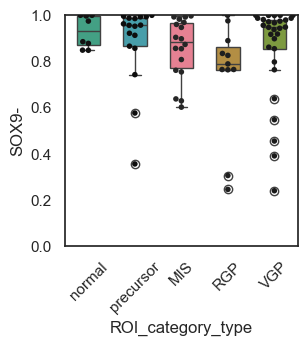

In [34]:
#look at relative ammount of cells negative for specific marker
order = ['normal','precursor','MIS','RGP','VGP']
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_byROI/negative_expression_byROI/")
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = levene_variance_test(df,'ROI_category_type',order)

   
    #plt.savefig("expbyROI_cat_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("expbyROI_cat_linegate_levenes{}.csv".format(str(df.columns[3])), header=False)
   # df.to_csv("expbyROI_cat_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



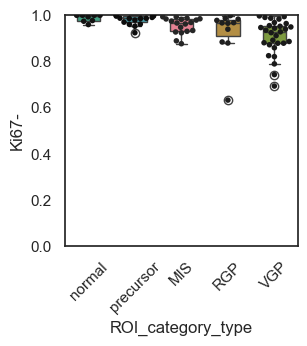

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

41.2% of the points cannot be placed; 

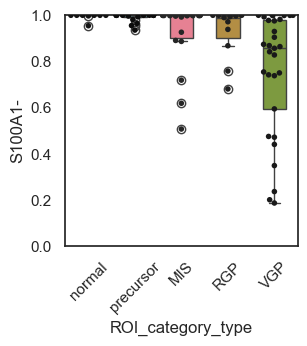

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

34.5% of the points cannot be placed; you may

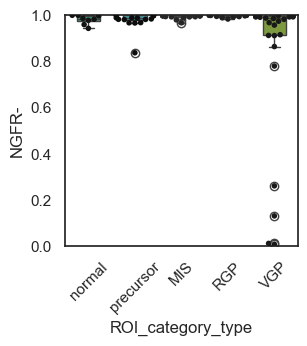

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



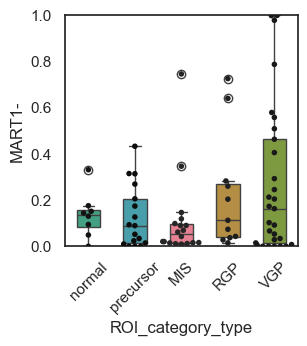

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



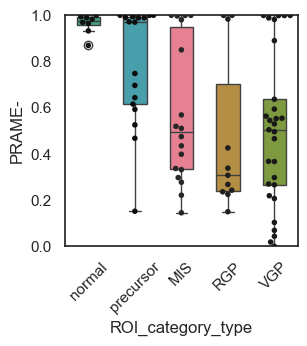

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1355761970.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



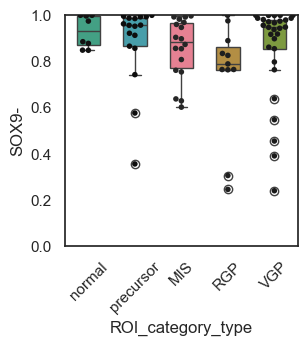

In [15]:
#look at relative ammount of cells negative for specific marker
order = ['normal','precursor','MIS','RGP','VGP']
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_byROI/levenes")
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = mann_whitney_test(df,'ROI_category_type',order)

   
    plt.savefig("expbyROI_cat_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("expbyROI_cat_linegate_pval{}.csv".format(str(df.columns[3])), header=False)
    df.to_csv("expbyROI_cat_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

37.5% of the points cannot 

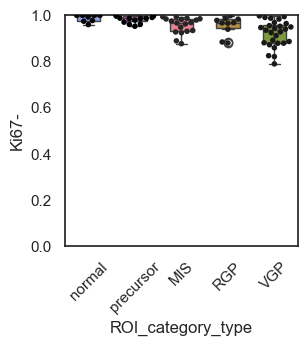

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

33.3% of the points cannot be plac

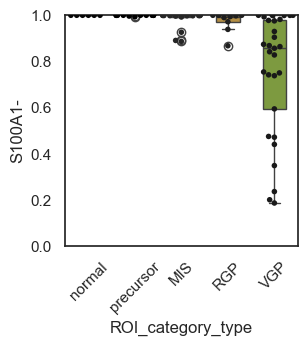

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:18: UserWarning:

set_ticklabels() should only be used 

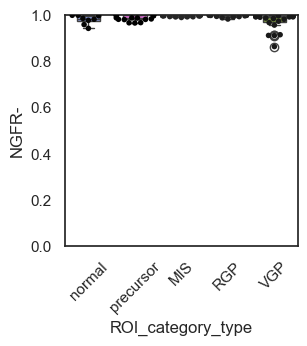

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:18: UserWarning:

set_ticklabels() should only be used w

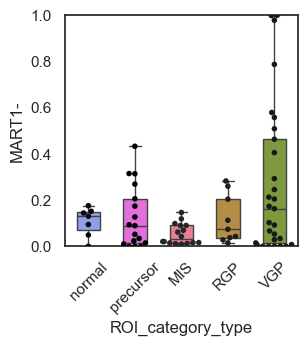

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.9% of the points cannot b

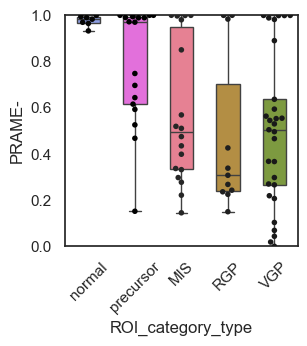

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/4271024295.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot b

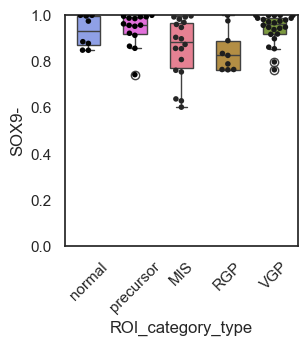

In [53]:
#look at relative ammount of cells negative for specific marker (MINUS OUTLIERS)
order = ['normal','precursor','MIS','RGP','VGP']
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_byROI_outliersremoved/ave_exp_byROI_neg")
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = remove_outliers_iqr(df,'ROI_category_type',value_col=df.columns[3])
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = mann_whitney_test(df,'ROI_category_type',order)
    l_values = levene_variance_test(df,'ROI_category_type',order)
   
    plt.savefig("expbyROI_cat_neg_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("expbyROI_cat_linegate__neg_pval{}.csv".format(str(df.columns[3])), header=False)
    pd.DataFrame.from_dict(data=l_values, orient='index').to_csv("expbyROI_cat_nooutlier_levenes_neg{}.csv".format(str(df.columns[3])), header=False)
    df.to_csv("expbyROI_cat_neg_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be

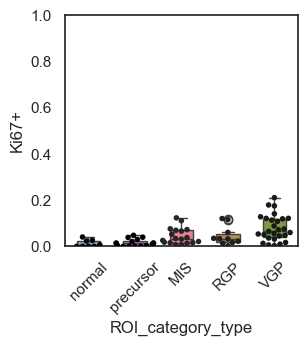

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

33.3% of the points cannot be place

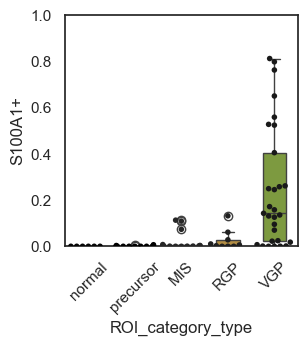

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:18: UserWarning:

set_ticklabels() should only be used wi

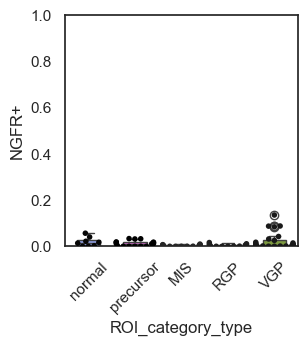

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

12.5% of the points cannot be

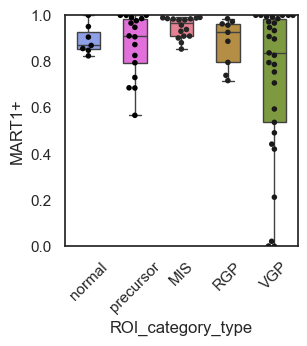

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



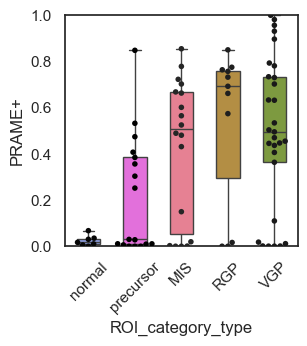

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:16: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/195299160.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

8.3% of the points cannot be 

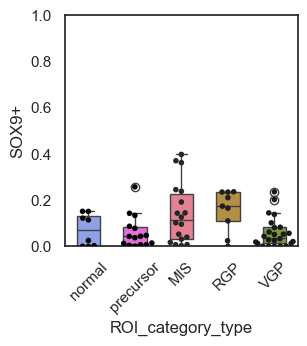

In [55]:
#look at relative ammount of cells positive for specific marker (MINUS OUTLIERS)
order = ['normal','precursor','MIS','RGP','VGP']
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_byROI_outliersremoved/ave_exp_byROI_neg")
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = remove_outliers_iqr(df,'ROI_category_type',value_col=df.columns[2])
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = mann_whitney_test(df,'ROI_category_type',order)
    l_values = levene_variance_test(df,'ROI_category_type',order)
   
    plt.savefig("expbyROI_cat_neg_linegate{}.pdf".format(df.columns[2]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("expbyROI_cat_linegate__neg_pval{}.csv".format(str(df.columns[2])), header=False)
    pd.DataFrame.from_dict(data=l_values, orient='index').to_csv("expbyROI_cat_nooutlier_levenes_neg{}.csv".format(str(df.columns[3])), header=False)
    df.to_csv("expbyROI_cat_neg_linegate{}.csv".format(str(df.columns[2])))    
    plt.show()
    plt.close()

In [36]:
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_breslow")

a = pd.read_csv('./expbybreslowKi67+.csv')
b = pd.read_csv('./expbybreslowSOX9+.csv')
c = pd.read_csv('./expbybreslowPRAME+.csv')
d = pd.read_csv('./expbybreslowMART1+.csv')
e = pd.read_csv('./expbybreslowNGFR+.csv')
f = pd.read_csv('./expbybreslowS100A1+.csv')
abc = [a,b,c,d,e,f]

    Unnamed: 0   Case     Ki67+     Ki67- ROI_category_type  Unnamed: 5
0            0  MEL14  0.083866  0.916134               1-2         NaN
1            1  MEL16  0.024901  0.975099                <1         NaN
2            2  MEL18  0.101358  0.898642               1-2         NaN
3            3  MEL19  0.005766  0.994234               1-2         NaN
4            4  MEL21  0.017331  0.982669                <1         NaN
5            5  MEL25  0.051804  0.948196               1-2         NaN
6            6  MEL26  0.066325  0.933675                <1         NaN
7            7  MEL27  0.054878  0.945122               1-2         NaN
11          11  MEL36  0.038314  0.961686                <1         NaN
13          13  MEL40  0.015205  0.984795                <1         NaN
14          14  MEL44  0.022904  0.977096                <1         NaN
15          15  MEL50  0.030340  0.969660                <1         NaN
16          16  MEL51  0.002563  0.997437               1-2     

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



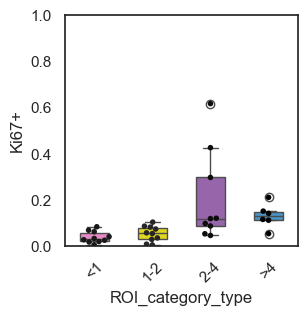

    Unnamed: 0   Case     SOX9+     SOX9- ROI_category_type
0            0  MEL14  0.071084  0.928916               1-2
1            1  MEL16  0.101418  0.898582                <1
2            2  MEL18  0.021390  0.978610               1-2
3            3  MEL19  0.082631  0.917369               1-2
4            4  MEL21  0.069325  0.930675                <1
5            5  MEL25  0.312635  0.687365               1-2
6            6  MEL26  0.222609  0.777391                <1
7            7  MEL27  0.017811  0.982189               1-2
11          11  MEL36  0.045977  0.954023                <1
13          13  MEL40  0.361738  0.638262                <1
14          14  MEL44  0.544200  0.455800                <1
15          15  MEL50  0.227795  0.772205                <1
16          16  MEL51  0.082387  0.917613               1-2
17          17  MEL53  0.630198  0.369802                <1
18          18  MEL54  0.099126  0.900874               1-2
19          19  MEL55  0.492538  0.50746

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



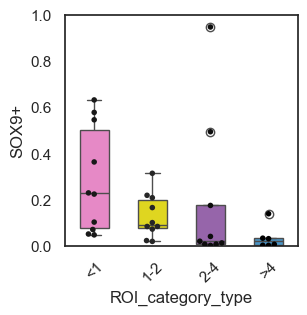

    Unnamed: 0   Case    PRAME+    PRAME- ROI_category_type
0            0  MEL14  0.233546  0.766454               1-2
1            1  MEL16  0.428265  0.571735                <1
2            2  MEL18  0.000533  0.999467               1-2
3            3  MEL19  0.769080  0.230920               1-2
4            4  MEL21  0.853441  0.146559                <1
5            5  MEL25  0.509839  0.490161               1-2
6            6  MEL26  0.644925  0.355075                <1
7            7  MEL27  0.102375  0.897625               1-2
11          11  MEL36  0.429119  0.570881                <1
13          13  MEL40  0.018212  0.981788                <1
14          14  MEL44  0.557996  0.442004                <1
15          15  MEL50  0.000245  0.999755                <1
16          16  MEL51  0.694251  0.305749               1-2
17          17  MEL53  0.001491  0.998509                <1
18          18  MEL54  0.665080  0.334920               1-2
19          19  MEL55  0.791552  0.20844

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



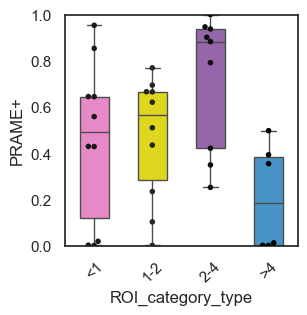

    Unnamed: 0   Case    MART1+    MART1- ROI_category_type
0            0  MEL14  0.933176  0.066824               1-2
1            2  MEL18  0.910446  0.089554               1-2
2            3  MEL19  0.440624  0.559376               1-2
3            5  MEL25  0.550518  0.449482               1-2
4            7  MEL27  0.395700  0.604300               1-2
5           16  MEL51  0.600879  0.399121               1-2
6           18  MEL54  0.943952  0.056048               1-2
7           21  MEL59  0.224686  0.775314               1-2
8           24  MEL68  0.766519  0.233481               1-2
9           25  MEL69  0.909771  0.090229               1-2
10          19  MEL55  0.672052  0.327948               2-4
11          20  MEL58  0.484747  0.515253               2-4
12          29  MEL73  0.645066  0.354934               2-4
13          32  MEL76  0.574232  0.425768               2-4
14          33  MEL78  0.913166  0.086834               2-4
15          34  MEL81  0.902204  0.09779

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



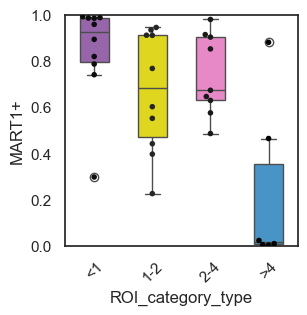

    Unnamed: 0   Case     NGFR+     NGFR- ROI_category_type
0            0  MEL14  0.002803  0.997197               1-2
1            1  MEL16  0.000907  0.999093                <1
2            2  MEL18  0.005947  0.994053               1-2
3            3  MEL19  0.006745  0.993255               1-2
4            4  MEL21  0.003702  0.996298                <1
5            5  MEL25  0.000904  0.999096               1-2
6            6  MEL26  0.002199  0.997801                <1
7            7  MEL27  0.226091  0.773909               1-2
11          11  MEL36  0.007663  0.992337                <1
13          13  MEL40  0.001003  0.998997                <1
14          14  MEL44  0.018216  0.981784                <1
15          15  MEL50  0.006362  0.993638                <1
16          16  MEL51  0.082754  0.917246               1-2
17          17  MEL53  0.005352  0.994648                <1
18          18  MEL54  0.015303  0.984697               1-2
19          19  MEL55  0.001584  0.99841

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



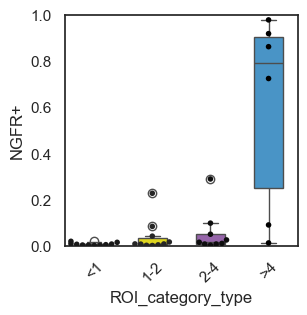

    Unnamed: 0   case   S100A1+   S100A1- ROI_category_type
0            0  MEL14  0.012557  0.987443               1-2
1            1  MEL16  0.276138  0.723862                <1
2            2  MEL18  0.055827  0.944173               1-2
3            3  MEL19  0.563020  0.436980               1-2
4            4  MEL21  0.016322  0.983678                <1
5            5  MEL25  0.072874  0.927126               1-2
6            6  MEL26  0.001099  0.998901                <1
7            7  MEL27  0.153723  0.846277               1-2
11          11  MEL36  0.003831  0.996169                <1
13          13  MEL40  0.000167  0.999833                <1
14          14  MEL44  0.113716  0.886284                <1
15          15  MEL50  0.131882  0.868118                <1
16          16  MEL51  0.397657  0.602343               1-2
17          17  MEL53  0.000088  0.999912                <1
18          18  MEL54  0.033747  0.966253               1-2
19          19  MEL55  0.206582  0.79341

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/111561900.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



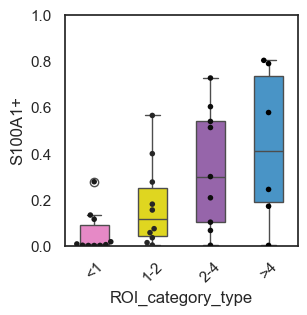

In [38]:
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_breslow")
order = ['<1', '1-2','2-4','>4']
rename_dict = {
    '1-2': 'Breslow_1_to_2mm',
    '<1': 'Breslow_less_than_1mm',
    '2-4': 'Breslow_2_to_4mm',
    '>4' : 'Breslow_more_than_4mm'
}
rename_dict = {
       'Breslow_1_to_2mm': '1-2',
        'Breslow_less_than_1mm':'<1',
          'Breslow_2_to_4mm':'2-4',
        'Breslow_more_than_4mm':'>4' 
}
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = df[df['ROI_category_type']!='MIS']
    df['ROI_category_type'] = df['ROI_category_type'].replace(rename_dict)
    print(df)
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = levene_variance_test(df,'ROI_category_type',order)

   
    #plt.savefig("breslow_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("breslow_linegate_levenes{}.csv".format(str(df.columns[2])), header=False)
    #df.to_csv("breslow_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

    Unnamed: 0   Case     Ki67+     Ki67- ROI_category_type  Unnamed: 5
0            0  MEL14  0.083866  0.916134               1-2         NaN
1            1  MEL16  0.024901  0.975099                <1         NaN
2            2  MEL18  0.101358  0.898642               1-2         NaN
3            3  MEL19  0.005766  0.994234               1-2         NaN
4            4  MEL21  0.017331  0.982669                <1         NaN
5            5  MEL25  0.051804  0.948196               1-2         NaN
6            6  MEL26  0.066325  0.933675                <1         NaN
7            7  MEL27  0.054878  0.945122               1-2         NaN
11          11  MEL36  0.038314  0.961686                <1         NaN
13          13  MEL40  0.015205  0.984795                <1         NaN
14          14  MEL44  0.022904  0.977096                <1         NaN
15          15  MEL50  0.030340  0.969660                <1         NaN
16          16  MEL51  0.002563  0.997437               1-2     

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



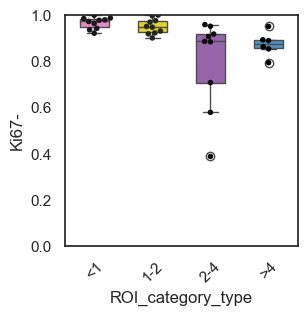

    Unnamed: 0   Case     SOX9+     SOX9- ROI_category_type
0            0  MEL14  0.071084  0.928916               1-2
1            1  MEL16  0.101418  0.898582                <1
2            2  MEL18  0.021390  0.978610               1-2
3            3  MEL19  0.082631  0.917369               1-2
4            4  MEL21  0.069325  0.930675                <1
5            5  MEL25  0.312635  0.687365               1-2
6            6  MEL26  0.222609  0.777391                <1
7            7  MEL27  0.017811  0.982189               1-2
11          11  MEL36  0.045977  0.954023                <1
13          13  MEL40  0.361738  0.638262                <1
14          14  MEL44  0.544200  0.455800                <1
15          15  MEL50  0.227795  0.772205                <1
16          16  MEL51  0.082387  0.917613               1-2
17          17  MEL53  0.630198  0.369802                <1
18          18  MEL54  0.099126  0.900874               1-2
19          19  MEL55  0.492538  0.50746

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



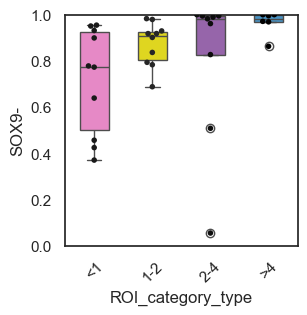

    Unnamed: 0   Case    PRAME+    PRAME- ROI_category_type
0            0  MEL14  0.233546  0.766454               1-2
1            1  MEL16  0.428265  0.571735                <1
2            2  MEL18  0.000533  0.999467               1-2
3            3  MEL19  0.769080  0.230920               1-2
4            4  MEL21  0.853441  0.146559                <1
5            5  MEL25  0.509839  0.490161               1-2
6            6  MEL26  0.644925  0.355075                <1
7            7  MEL27  0.102375  0.897625               1-2
11          11  MEL36  0.429119  0.570881                <1
13          13  MEL40  0.018212  0.981788                <1
14          14  MEL44  0.557996  0.442004                <1
15          15  MEL50  0.000245  0.999755                <1
16          16  MEL51  0.694251  0.305749               1-2
17          17  MEL53  0.001491  0.998509                <1
18          18  MEL54  0.665080  0.334920               1-2
19          19  MEL55  0.791552  0.20844

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



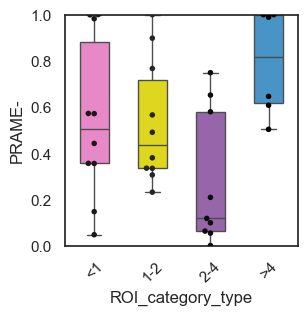

    Unnamed: 0   Case    MART1+    MART1- ROI_category_type
0            0  MEL14  0.933176  0.066824               1-2
1            2  MEL18  0.910446  0.089554               1-2
2            3  MEL19  0.440624  0.559376               1-2
3            5  MEL25  0.550518  0.449482               1-2
4            7  MEL27  0.395700  0.604300               1-2
5           16  MEL51  0.600879  0.399121               1-2
6           18  MEL54  0.943952  0.056048               1-2
7           21  MEL59  0.224686  0.775314               1-2
8           24  MEL68  0.766519  0.233481               1-2
9           25  MEL69  0.909771  0.090229               1-2
10          19  MEL55  0.672052  0.327948               2-4
11          20  MEL58  0.484747  0.515253               2-4
12          29  MEL73  0.645066  0.354934               2-4
13          32  MEL76  0.574232  0.425768               2-4
14          33  MEL78  0.913166  0.086834               2-4
15          34  MEL81  0.902204  0.09779

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



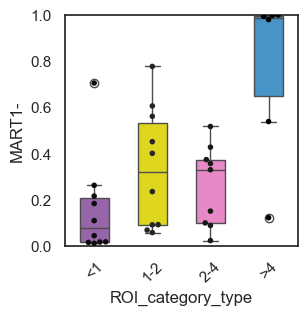

    Unnamed: 0   Case     NGFR+     NGFR- ROI_category_type
0            0  MEL14  0.002803  0.997197               1-2
1            1  MEL16  0.000907  0.999093                <1
2            2  MEL18  0.005947  0.994053               1-2
3            3  MEL19  0.006745  0.993255               1-2
4            4  MEL21  0.003702  0.996298                <1
5            5  MEL25  0.000904  0.999096               1-2
6            6  MEL26  0.002199  0.997801                <1
7            7  MEL27  0.226091  0.773909               1-2
11          11  MEL36  0.007663  0.992337                <1
13          13  MEL40  0.001003  0.998997                <1
14          14  MEL44  0.018216  0.981784                <1
15          15  MEL50  0.006362  0.993638                <1
16          16  MEL51  0.082754  0.917246               1-2
17          17  MEL53  0.005352  0.994648                <1
18          18  MEL54  0.015303  0.984697               1-2
19          19  MEL55  0.001584  0.99841

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



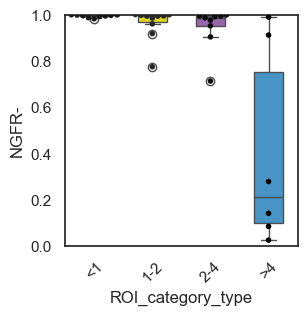

    Unnamed: 0   case   S100A1+   S100A1- ROI_category_type
0            0  MEL14  0.012557  0.987443               1-2
1            1  MEL16  0.276138  0.723862                <1
2            2  MEL18  0.055827  0.944173               1-2
3            3  MEL19  0.563020  0.436980               1-2
4            4  MEL21  0.016322  0.983678                <1
5            5  MEL25  0.072874  0.927126               1-2
6            6  MEL26  0.001099  0.998901                <1
7            7  MEL27  0.153723  0.846277               1-2
11          11  MEL36  0.003831  0.996169                <1
13          13  MEL40  0.000167  0.999833                <1
14          14  MEL44  0.113716  0.886284                <1
15          15  MEL50  0.131882  0.868118                <1
16          16  MEL51  0.397657  0.602343               1-2
17          17  MEL53  0.000088  0.999912                <1
18          18  MEL54  0.033747  0.966253               1-2
19          19  MEL55  0.206582  0.79341

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1967436949.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



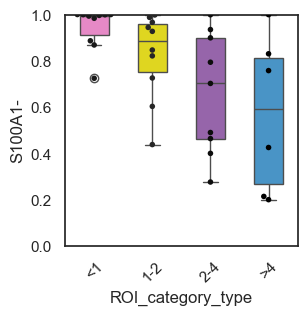

In [39]:
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_breslow/breslow_negative")
order = ['<1', '1-2','2-4','>4']
rename_dict = {
    '1-2': 'Breslow_1_to_2mm',
    '<1': 'Breslow_less_than_1mm',
    '2-4': 'Breslow_2_to_4mm',
    '>4' : 'Breslow_more_than_4mm'
}
rename_dict = {
       'Breslow_1_to_2mm': '1-2',
        'Breslow_less_than_1mm':'<1',
          'Breslow_2_to_4mm':'2-4',
        'Breslow_more_than_4mm':'>4' 
}
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = df[df['ROI_category_type']!='MIS']
    df['ROI_category_type'] = df['ROI_category_type'].replace(rename_dict)
    print(df)
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[3], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = levene_variance_test(df,'ROI_category_type',order)

   
    #plt.savefig("breslow_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("breslow_neg_levenes{}.csv".format(str(df.columns[3])), header=False)
    #df.to_csv("breslow_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

    Unnamed: 0   Case     Ki67+     Ki67- ROI_category_type
0            0  MEL14  0.083866  0.916134               1-2
1            1  MEL16  0.024901  0.975099                <1
2            2  MEL18  0.101358  0.898642               1-2
3            3  MEL19  0.005766  0.994234               1-2
4            4  MEL21  0.017331  0.982669                <1
5            5  MEL25  0.051804  0.948196               1-2
6            6  MEL26  0.066325  0.933675                <1
7            7  MEL27  0.054878  0.945122               1-2
11          11  MEL36  0.038314  0.961686                <1
13          13  MEL40  0.015205  0.984795                <1
14          14  MEL44  0.022904  0.977096                <1
15          15  MEL50  0.030340  0.969660                <1
16          16  MEL51  0.002563  0.997437               1-2
17          17  MEL53  0.081242  0.918758                <1
18          18  MEL54  0.026500  0.973500               1-2
19          19  MEL55  0.043541  0.95645

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



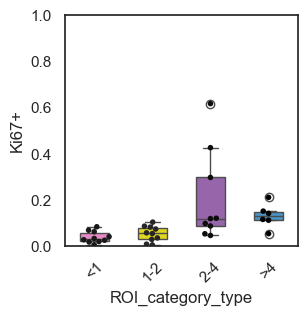

    Unnamed: 0   Case     SOX9+     SOX9- ROI_category_type
0            0  MEL14  0.071084  0.928916               1-2
1            1  MEL16  0.101418  0.898582                <1
2            2  MEL18  0.021390  0.978610               1-2
3            3  MEL19  0.082631  0.917369               1-2
4            4  MEL21  0.069325  0.930675                <1
5            5  MEL25  0.312635  0.687365               1-2
6            6  MEL26  0.222609  0.777391                <1
7            7  MEL27  0.017811  0.982189               1-2
11          11  MEL36  0.045977  0.954023                <1
13          13  MEL40  0.361738  0.638262                <1
14          14  MEL44  0.544200  0.455800                <1
15          15  MEL50  0.227795  0.772205                <1
16          16  MEL51  0.082387  0.917613               1-2
17          17  MEL53  0.630198  0.369802                <1
18          18  MEL54  0.099126  0.900874               1-2
19          19  MEL55  0.492538  0.50746

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



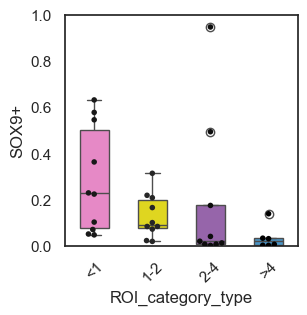

    Unnamed: 0   Case    PRAME+    PRAME- ROI_category_type
0            0  MEL14  0.233546  0.766454               1-2
1            1  MEL16  0.428265  0.571735                <1
2            2  MEL18  0.000533  0.999467               1-2
3            3  MEL19  0.769080  0.230920               1-2
4            4  MEL21  0.853441  0.146559                <1
5            5  MEL25  0.509839  0.490161               1-2
6            6  MEL26  0.644925  0.355075                <1
7            7  MEL27  0.102375  0.897625               1-2
11          11  MEL36  0.429119  0.570881                <1
13          13  MEL40  0.018212  0.981788                <1
14          14  MEL44  0.557996  0.442004                <1
15          15  MEL50  0.000245  0.999755                <1
16          16  MEL51  0.694251  0.305749               1-2
17          17  MEL53  0.001491  0.998509                <1
18          18  MEL54  0.665080  0.334920               1-2
19          19  MEL55  0.791552  0.20844

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



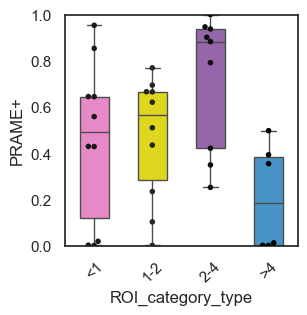

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.




    Unnamed: 0   Case    MART1+    MART1- ROI_category_type
0            0  MEL14  0.933176  0.066824               1-2
1            2  MEL18  0.910446  0.089554               1-2
2            3  MEL19  0.440624  0.559376               1-2
3            5  MEL25  0.550518  0.449482               1-2
4            7  MEL27  0.395700  0.604300               1-2
5           16  MEL51  0.600879  0.399121               1-2
6           18  MEL54  0.943952  0.056048               1-2
7           21  MEL59  0.224686  0.775314               1-2
8           24  MEL68  0.766519  0.233481               1-2
9           25  MEL69  0.909771  0.090229               1-2
10          19  MEL55  0.672052  0.327948               2-4
11          20  MEL58  0.484747  0.515253               2-4
12          29  MEL73  0.645066  0.354934               2-4
13          32  MEL76  0.574232  0.425768               2-4
14          33  MEL78  0.913166  0.086834               2-4
15          34  MEL81  0.902204  0.09779

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



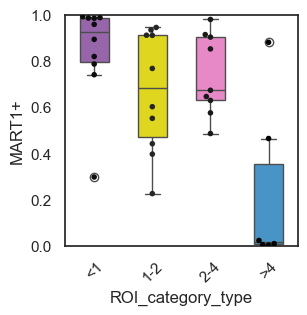

    Unnamed: 0   Case     NGFR+     NGFR- ROI_category_type
0            0  MEL14  0.002803  0.997197               1-2
1            1  MEL16  0.000907  0.999093                <1
2            2  MEL18  0.005947  0.994053               1-2
3            3  MEL19  0.006745  0.993255               1-2
4            4  MEL21  0.003702  0.996298                <1
5            5  MEL25  0.000904  0.999096               1-2
6            6  MEL26  0.002199  0.997801                <1
7            7  MEL27  0.226091  0.773909               1-2
11          11  MEL36  0.007663  0.992337                <1
13          13  MEL40  0.001003  0.998997                <1
14          14  MEL44  0.018216  0.981784                <1
15          15  MEL50  0.006362  0.993638                <1
16          16  MEL51  0.082754  0.917246               1-2
17          17  MEL53  0.005352  0.994648                <1
18          18  MEL54  0.015303  0.984697               1-2
19          19  MEL55  0.001584  0.99841

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/scimap/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



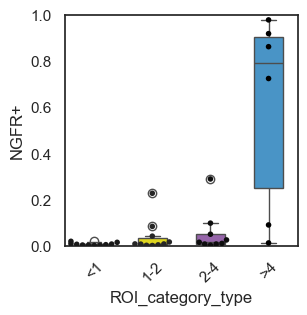

    Unnamed: 0   case   S100A1+   S100A1- ROI_category_type
0            0  MEL14  0.012557  0.987443               1-2
1            1  MEL16  0.276138  0.723862                <1
2            2  MEL18  0.055827  0.944173               1-2
3            3  MEL19  0.563020  0.436980               1-2
4            4  MEL21  0.016322  0.983678                <1
5            5  MEL25  0.072874  0.927126               1-2
6            6  MEL26  0.001099  0.998901                <1
7            7  MEL27  0.153723  0.846277               1-2
11          11  MEL36  0.003831  0.996169                <1
13          13  MEL40  0.000167  0.999833                <1
14          14  MEL44  0.113716  0.886284                <1
15          15  MEL50  0.131882  0.868118                <1
16          16  MEL51  0.397657  0.602343               1-2
17          17  MEL53  0.000088  0.999912                <1
18          18  MEL54  0.033747  0.966253               1-2
19          19  MEL55  0.206582  0.79341

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:29: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/3566037593.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



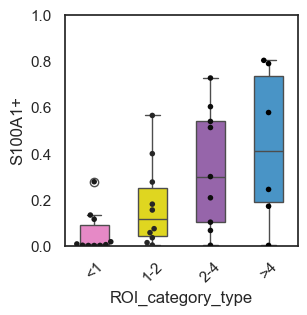

In [29]:
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/PCA_phaseII/cycif_analysis_materials/merged_dataset/line_plot+aveexpV2/ave_expression_breslow/")
order = ['<1', '1-2','2-4','>4']
rename_dict = {
    '1-2': 'Breslow_1_to_2mm',
    '<1': 'Breslow_less_than_1mm',
    '2-4': 'Breslow_2_to_4mm',
    '>4' : 'Breslow_more_than_4mm'
}
rename_dict = {
       'Breslow_1_to_2mm': '1-2',
        'Breslow_less_than_1mm':'<1',
          'Breslow_2_to_4mm':'2-4',
        'Breslow_more_than_4mm':'>4' 
}
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = df[df['ROI_category_type']!='MIS']
    df['ROI_category_type'] = df['ROI_category_type'].replace(rename_dict)
    print(df)
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    p_values = mann_whitney_test(df,'ROI_category_type',order)

   
    #plt.savefig("breslow_linegate{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("expbybreslow_pval{}.csv".format(str(df.columns[2])), header=False)
    #df.to_csv("breslow_linegate{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()

    Unnamed: 0   Case     Ki67+     Ki67- ROI_category_type  Unnamed: 5
0            0  MEL14  0.083866  0.916134               1-2         NaN
2            2  MEL18  0.101358  0.898642               1-2         NaN
3            3  MEL19  0.005766  0.994234               1-2         NaN
5            5  MEL25  0.051804  0.948196               1-2         NaN
7            7  MEL27  0.054878  0.945122               1-2         NaN
16          16  MEL51  0.002563  0.997437               1-2         NaN
18          18  MEL54  0.026500  0.973500               1-2         NaN
21          21  MEL59  0.071491  0.928509               1-2         NaN
24          24  MEL68  0.079704  0.920296               1-2         NaN
25          25  MEL69  0.032872  0.967128               1-2         NaN
19          19  MEL55  0.043541  0.956459               2-4         NaN
20          20  MEL58  0.095460  0.904540               2-4         NaN
29          29  MEL73  0.050906  0.949094               2-4     

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



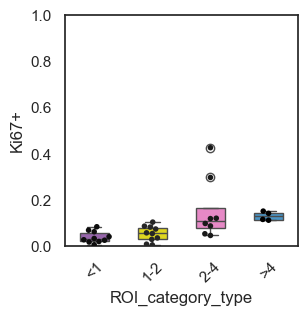

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



    Unnamed: 0   Case     SOX9+     SOX9- ROI_category_type
0            0  MEL14  0.071084  0.928916               1-2
2            2  MEL18  0.021390  0.978610               1-2
3            3  MEL19  0.082631  0.917369               1-2
5            5  MEL25  0.312635  0.687365               1-2
7            7  MEL27  0.017811  0.982189               1-2
16          16  MEL51  0.082387  0.917613               1-2
18          18  MEL54  0.099126  0.900874               1-2
21          21  MEL59  0.217391  0.782609               1-2
24          24  MEL68  0.206963  0.793037               1-2
25          25  MEL69  0.164190  0.835810               1-2
20          20  MEL58  0.173459  0.826541               2-4
29          29  MEL73  0.039374  0.960626               2-4
32          32  MEL76  0.006312  0.993688               2-4
33          33  MEL78  0.000467  0.999533               2-4
34          34  MEL81  0.018621  0.981379               2-4
36          36  MEL84  0.011250  0.98875

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



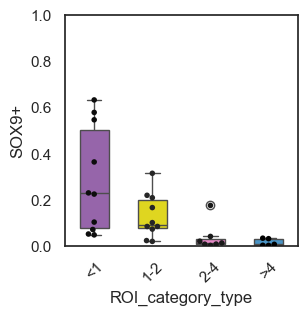

    Unnamed: 0   Case    PRAME+    PRAME- ROI_category_type
0            0  MEL14  0.233546  0.766454               1-2
1            1  MEL16  0.428265  0.571735                <1
2            2  MEL18  0.000533  0.999467               1-2
3            3  MEL19  0.769080  0.230920               1-2
4            4  MEL21  0.853441  0.146559                <1
5            5  MEL25  0.509839  0.490161               1-2
6            6  MEL26  0.644925  0.355075                <1
7            7  MEL27  0.102375  0.897625               1-2
11          11  MEL36  0.429119  0.570881                <1
13          13  MEL40  0.018212  0.981788                <1
14          14  MEL44  0.557996  0.442004                <1
15          15  MEL50  0.000245  0.999755                <1
16          16  MEL51  0.694251  0.305749               1-2
17          17  MEL53  0.001491  0.998509                <1
18          18  MEL54  0.665080  0.334920               1-2
19          19  MEL55  0.791552  0.20844

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



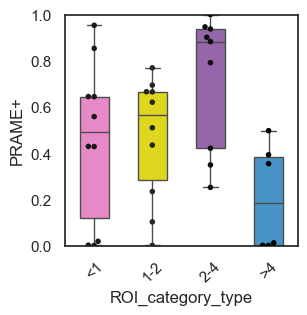

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.




    Unnamed: 0   Case    MART1+    MART1- ROI_category_type
0            0  MEL14  0.933176  0.066824               1-2
1            2  MEL18  0.910446  0.089554               1-2
2            3  MEL19  0.440624  0.559376               1-2
3            5  MEL25  0.550518  0.449482               1-2
4            7  MEL27  0.395700  0.604300               1-2
5           16  MEL51  0.600879  0.399121               1-2
6           18  MEL54  0.943952  0.056048               1-2
7           21  MEL59  0.224686  0.775314               1-2
8           24  MEL68  0.766519  0.233481               1-2
9           25  MEL69  0.909771  0.090229               1-2
10          19  MEL55  0.672052  0.327948               2-4
11          20  MEL58  0.484747  0.515253               2-4
12          29  MEL73  0.645066  0.354934               2-4
13          32  MEL76  0.574232  0.425768               2-4
14          33  MEL78  0.913166  0.086834               2-4
15          34  MEL81  0.902204  0.09779

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



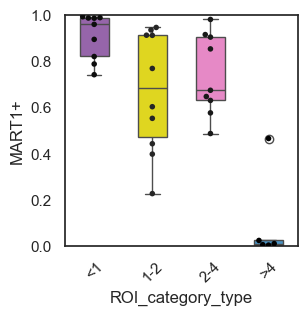

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



    Unnamed: 0   Case     NGFR+     NGFR- ROI_category_type
0            0  MEL14  0.002803  0.997197               1-2
2            2  MEL18  0.005947  0.994053               1-2
3            3  MEL19  0.006745  0.993255               1-2
5            5  MEL25  0.000904  0.999096               1-2
18          18  MEL54  0.015303  0.984697               1-2
21          21  MEL59  0.040560  0.959440               1-2
24          24  MEL68  0.000074  0.999926               1-2
25          25  MEL69  0.006923  0.993077               1-2
19          19  MEL55  0.001584  0.998416               2-4
20          20  MEL58  0.006501  0.993499               2-4
29          29  MEL73  0.014278  0.985722               2-4
32          32  MEL76  0.024132  0.975868               2-4
33          33  MEL78  0.096898  0.903102               2-4
34          34  MEL81  0.048868  0.951132               2-4
37          37  MEL85  0.006363  0.993637               2-4
38          38  MEL86  0.009141  0.99085

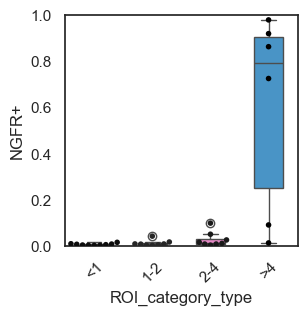

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2723365990.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



    Unnamed: 0   case   S100A1+   S100A1- ROI_category_type
0            0  MEL14  0.012557  0.987443               1-2
2            2  MEL18  0.055827  0.944173               1-2
3            3  MEL19  0.563020  0.436980               1-2
5            5  MEL25  0.072874  0.927126               1-2
7            7  MEL27  0.153723  0.846277               1-2
16          16  MEL51  0.397657  0.602343               1-2
18          18  MEL54  0.033747  0.966253               1-2
21          21  MEL59  0.001897  0.998103               1-2
24          24  MEL68  0.274741  0.725259               1-2
25          25  MEL69  0.179050  0.820950               1-2
19          19  MEL55  0.206582  0.793418               2-4
20          20  MEL58  0.298341  0.701659               2-4
29          29  MEL73  0.065184  0.934816               2-4
32          32  MEL76  0.601068  0.398932               2-4
33          33  MEL78  0.537196  0.462804               2-4
34          34  MEL81  0.725136  0.27486

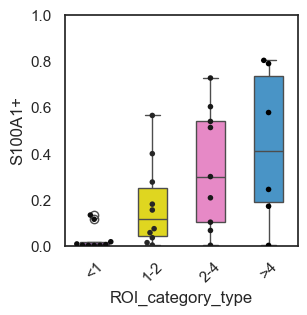

In [48]:
#try removing outliers
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_breslow_outliersremoved")
order = ['<1', '1-2','2-4','>4']
rename_dict = {
    '1-2': 'Breslow_1_to_2mm',
    '<1': 'Breslow_less_than_1mm',
    '2-4': 'Breslow_2_to_4mm',
    '>4' : 'Breslow_more_than_4mm'
}
rename_dict = {
       'Breslow_1_to_2mm': '1-2',
        'Breslow_less_than_1mm':'<1',
          'Breslow_2_to_4mm':'2-4',
        'Breslow_more_than_4mm':'>4' 
}
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = df[df['ROI_category_type']!='MIS']
    df = remove_outliers_iqr(df,'ROI_category_type',value_col=df.columns[2])
    df['ROI_category_type'] = df['ROI_category_type'].replace(rename_dict)
    print(df)
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    l_values = levene_variance_test(df,'ROI_category_type',order)
    p_values = mann_whitney_test(df,'ROI_category_type',order)

   
    plt.savefig("breslow_nooutlier{}.pdf".format(df.columns[2]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=l_values, orient='index').to_csv("breslow_nooutlier_levenes{}.csv".format(str(df.columns[2])), header=False)
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("breslow_nooutlier_pval{}.csv".format(str(df.columns[2])), header=False)
    df.to_csv("breslow_nooutlier{}.csv".format(str(df.columns[2])))    
    plt.show()
    plt.close()



/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



    Unnamed: 0   Case     Ki67+     Ki67- ROI_category_type  Unnamed: 5
0            0  MEL14  0.083866  0.916134               1-2         NaN
2            2  MEL18  0.101358  0.898642               1-2         NaN
3            3  MEL19  0.005766  0.994234               1-2         NaN
5            5  MEL25  0.051804  0.948196               1-2         NaN
7            7  MEL27  0.054878  0.945122               1-2         NaN
16          16  MEL51  0.002563  0.997437               1-2         NaN
18          18  MEL54  0.026500  0.973500               1-2         NaN
21          21  MEL59  0.071491  0.928509               1-2         NaN
24          24  MEL68  0.079704  0.920296               1-2         NaN
25          25  MEL69  0.032872  0.967128               1-2         NaN
19          19  MEL55  0.043541  0.956459               2-4         NaN
20          20  MEL58  0.095460  0.904540               2-4         NaN
29          29  MEL73  0.050906  0.949094               2-4     

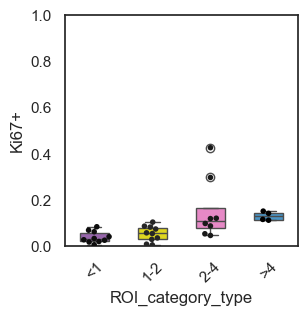

    Unnamed: 0   Case     SOX9+     SOX9- ROI_category_type
0            0  MEL14  0.071084  0.928916               1-2
2            2  MEL18  0.021390  0.978610               1-2
3            3  MEL19  0.082631  0.917369               1-2
5            5  MEL25  0.312635  0.687365               1-2
7            7  MEL27  0.017811  0.982189               1-2
16          16  MEL51  0.082387  0.917613               1-2
18          18  MEL54  0.099126  0.900874               1-2
21          21  MEL59  0.217391  0.782609               1-2
24          24  MEL68  0.206963  0.793037               1-2
25          25  MEL69  0.164190  0.835810               1-2
20          20  MEL58  0.173459  0.826541               2-4
29          29  MEL73  0.039374  0.960626               2-4
32          32  MEL76  0.006312  0.993688               2-4
33          33  MEL78  0.000467  0.999533               2-4
34          34  MEL81  0.018621  0.981379               2-4
36          36  MEL84  0.011250  0.98875

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



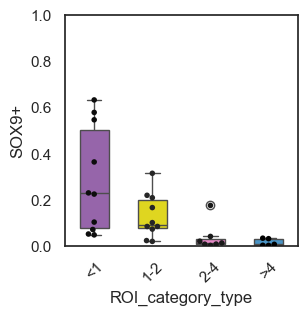

    Unnamed: 0   Case    PRAME+    PRAME- ROI_category_type
0            0  MEL14  0.233546  0.766454               1-2
1            1  MEL16  0.428265  0.571735                <1
2            2  MEL18  0.000533  0.999467               1-2
3            3  MEL19  0.769080  0.230920               1-2
4            4  MEL21  0.853441  0.146559                <1
5            5  MEL25  0.509839  0.490161               1-2
6            6  MEL26  0.644925  0.355075                <1
7            7  MEL27  0.102375  0.897625               1-2
11          11  MEL36  0.429119  0.570881                <1
13          13  MEL40  0.018212  0.981788                <1
14          14  MEL44  0.557996  0.442004                <1
15          15  MEL50  0.000245  0.999755                <1
16          16  MEL51  0.694251  0.305749               1-2
17          17  MEL53  0.001491  0.998509                <1
18          18  MEL54  0.665080  0.334920               1-2
19          19  MEL55  0.791552  0.20844

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



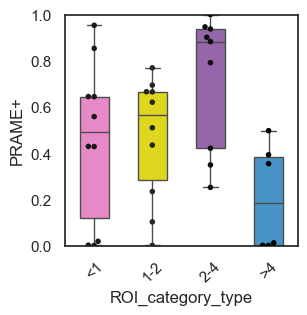

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.




    Unnamed: 0   Case    MART1+    MART1- ROI_category_type
0            0  MEL14  0.933176  0.066824               1-2
1            2  MEL18  0.910446  0.089554               1-2
2            3  MEL19  0.440624  0.559376               1-2
3            5  MEL25  0.550518  0.449482               1-2
4            7  MEL27  0.395700  0.604300               1-2
5           16  MEL51  0.600879  0.399121               1-2
6           18  MEL54  0.943952  0.056048               1-2
7           21  MEL59  0.224686  0.775314               1-2
8           24  MEL68  0.766519  0.233481               1-2
9           25  MEL69  0.909771  0.090229               1-2
10          19  MEL55  0.672052  0.327948               2-4
11          20  MEL58  0.484747  0.515253               2-4
12          29  MEL73  0.645066  0.354934               2-4
13          32  MEL76  0.574232  0.425768               2-4
14          33  MEL78  0.913166  0.086834               2-4
15          34  MEL81  0.902204  0.09779

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



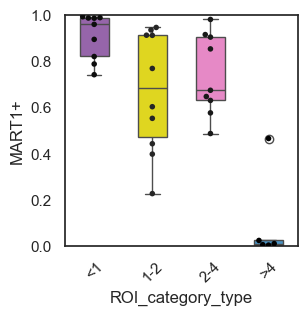

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



    Unnamed: 0   Case     NGFR+     NGFR- ROI_category_type
0            0  MEL14  0.002803  0.997197               1-2
2            2  MEL18  0.005947  0.994053               1-2
3            3  MEL19  0.006745  0.993255               1-2
5            5  MEL25  0.000904  0.999096               1-2
18          18  MEL54  0.015303  0.984697               1-2
21          21  MEL59  0.040560  0.959440               1-2
24          24  MEL68  0.000074  0.999926               1-2
25          25  MEL69  0.006923  0.993077               1-2
19          19  MEL55  0.001584  0.998416               2-4
20          20  MEL58  0.006501  0.993499               2-4
29          29  MEL73  0.014278  0.985722               2-4
32          32  MEL76  0.024132  0.975868               2-4
33          33  MEL78  0.096898  0.903102               2-4
34          34  MEL81  0.048868  0.951132               2-4
37          37  MEL85  0.006363  0.993637               2-4
38          38  MEL86  0.009141  0.99085

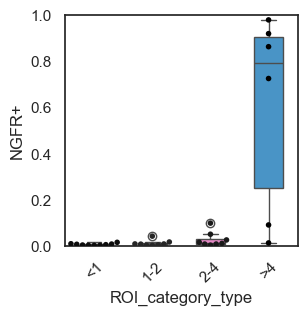

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/1160537158.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:31: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


/var/folders/82/l6mxy0c54xd4wh6q8cblc7l00000gn/T/ipykernel_35656/2836026909.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



    Unnamed: 0   case   S100A1+   S100A1- ROI_category_type
0            0  MEL14  0.012557  0.987443               1-2
2            2  MEL18  0.055827  0.944173               1-2
3            3  MEL19  0.563020  0.436980               1-2
5            5  MEL25  0.072874  0.927126               1-2
7            7  MEL27  0.153723  0.846277               1-2
16          16  MEL51  0.397657  0.602343               1-2
18          18  MEL54  0.033747  0.966253               1-2
21          21  MEL59  0.001897  0.998103               1-2
24          24  MEL68  0.274741  0.725259               1-2
25          25  MEL69  0.179050  0.820950               1-2
19          19  MEL55  0.206582  0.793418               2-4
20          20  MEL58  0.298341  0.701659               2-4
29          29  MEL73  0.065184  0.934816               2-4
32          32  MEL76  0.601068  0.398932               2-4
33          33  MEL78  0.537196  0.462804               2-4
34          34  MEL81  0.725136  0.27486

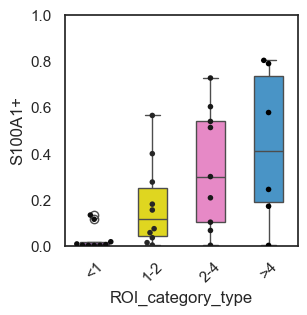

In [49]:
#try removing outliers
os.chdir("/Users/roxannepelletier/HMS Dropbox/Roxanne Pelletier/2024-Vallius-Novikov-Shi-Melanoma_PCA/data/merged_dataset/line_plot+aveexpV2/ave_expression_breslow_outliersremoved/breslow_negative")
order = ['<1', '1-2','2-4','>4']
rename_dict = {
    '1-2': 'Breslow_1_to_2mm',
    '<1': 'Breslow_less_than_1mm',
    '2-4': 'Breslow_2_to_4mm',
    '>4' : 'Breslow_more_than_4mm'
}
rename_dict = {
       'Breslow_1_to_2mm': '1-2',
        'Breslow_less_than_1mm':'<1',
          'Breslow_2_to_4mm':'2-4',
        'Breslow_more_than_4mm':'>4' 
}
for x in abc:    
    df=pd.DataFrame(x)
    # Add the recurrence_status column
    #df['ROI_category_type'] = df['Mel_ROI_combined'].str.split('_').str[1]
    df = df[df['ROI_category_type']!='nan']
    df = df[df['ROI_category_type']!='MIS']
    df = remove_outliers_iqr(df,'ROI_category_type',value_col=df.columns[2])
    df['ROI_category_type'] = df['ROI_category_type'].replace(rename_dict)
    print(df)
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (3,3)
    my_colors = ["#fff300","#f579cb","#9b59b6", "#3498db",  
             "#2ecc71"]
    sns.set_palette( my_colors )

    sns.swarmplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',color='black',s=4 , order =order,legend=None)
    ax=sns.boxplot(data=df, x='ROI_category_type',y=df.columns[2], hue='ROI_category_type',width=.5, dodge=False,order =order)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    plt.ylim(0, 1)
    l_values = levene_variance_test(df,'ROI_category_type',order)
    p_values = mann_whitney_test(df,'ROI_category_type',order)

   
    plt.savefig("breslow_nooutlier_neg{}.pdf".format(df.columns[3]),bbox_inches='tight') 
    pd.DataFrame.from_dict(data=l_values, orient='index').to_csv("breslow_nooutlier_levenes_neg{}.csv".format(str(df.columns[3])), header=False)
    pd.DataFrame.from_dict(data=p_values, orient='index').to_csv("breslow_nooutlier_pval_neg{}.csv".format(str(df.columns[3])), header=False)
    df.to_csv("breslow_nooutlier_neg{}.csv".format(str(df.columns[3])))    
    plt.show()
    plt.close()
